In [3]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal",  "Fraud"]

In [4]:
data = pd.read_csv('fraudtrain.csv',sep=',')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
data1 = pd.read_csv('fraudtest.csv',sep=',')
data1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
data.isnull().values.any()

False

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

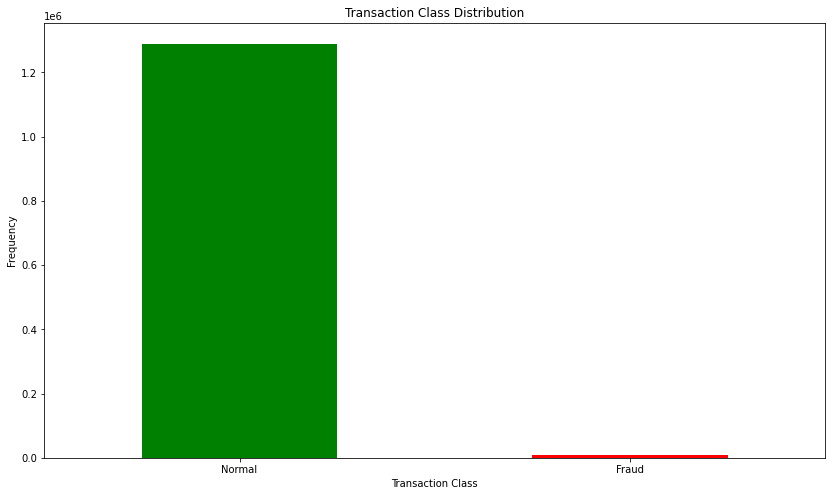

In [9]:
LABELS = ['Normal', 'Fraud']
count_classes = pd.value_counts(data['is_fraud'], sort=True)
colors = ['green', 'red']
count_classes.plot(kind='bar', rot=0, color=colors)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Transaction Class")
plt.ylabel("Frequency")
plt.show()

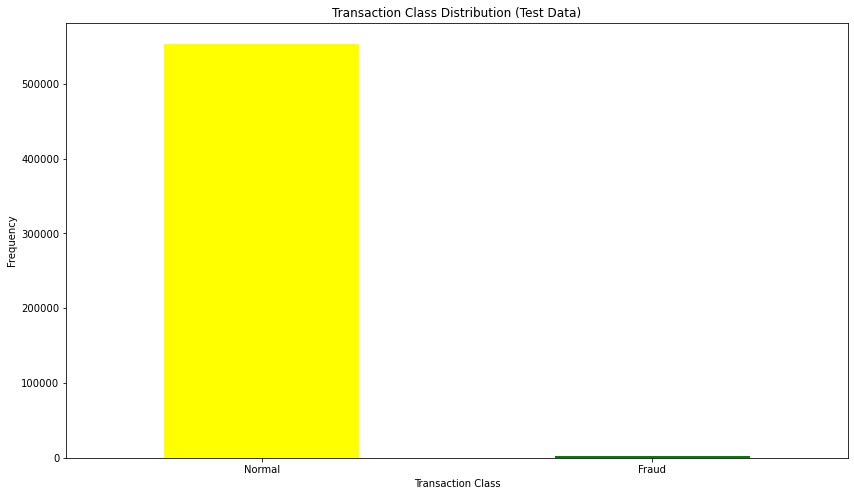

In [10]:
import matplotlib.pyplot as plt
LABELS = ['Normal', 'Fraud']
count_classes = pd.value_counts(data1['is_fraud'], sort=True)
colors = ['yellow', 'green']
count_classes.plot(kind='bar', rot=0, color=colors)
plt.title("Transaction Class Distribution (Test Data)")
plt.xticks(range(2), LABELS)
plt.xlabel("Transaction Class")
plt.ylabel("Frequency")
plt.show()

In [11]:
fraud = data [data['is_fraud']==1]
normal = data [data['is_fraud']==0]

In [12]:
print(fraud.shape, normal.shape)

(7506, 23) (1289169, 23)


In [13]:
fraud.merch_long.describe()

count    7506.000000
mean      -89.915808
std        14.298685
min      -166.550779
25%       -96.671038
50%       -86.813044
75%       -79.907096
max       -67.569238
Name: merch_long, dtype: float64

In [14]:
normal.merch_long.describe()

count    1.289169e+06
mean    -9.022827e+01
std      1.376794e+01
min     -1.666712e+02
25%     -9.689853e+01
50%     -8.744091e+01
75%     -8.023853e+01
max     -6.695090e+01
Name: merch_long, dtype: float64

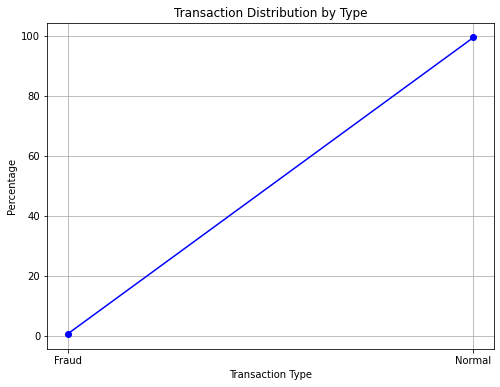

In [15]:
fraud_freq_train = len(data[data['is_fraud'] == 1])
normal_freq_train = len(data[data['is_fraud'] == 0])
total_transactions = fraud_freq_train + normal_freq_train
fraud_percentage = (fraud_freq_train / total_transactions) * 100
normal_percentage = (normal_freq_train / total_transactions) * 100
transaction_types = ['Fraud', 'Normal']
percentages = [fraud_percentage, normal_percentage]
plt.figure(figsize=(8, 6))
plt.plot(transaction_types, percentages, marker='o', linestyle='-', color='b')
plt.title('Transaction Distribution by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()

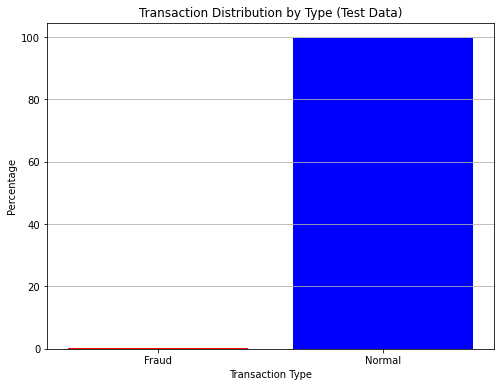

In [16]:
fraud_freq_test = len(data1[data1['is_fraud'] == 1])
normal_freq_test = len(data1[data1['is_fraud'] == 0])
total_transactions_test = fraud_freq_test + normal_freq_test
fraud_percentage_test = (fraud_freq_test / total_transactions_test) * 100
normal_percentage_test = (normal_freq_test / total_transactions_test) * 100
transaction_types = ['Fraud', 'Normal']
percentages = [fraud_percentage_test, normal_percentage_test]
plt.figure(figsize=(8, 6))
plt.bar(transaction_types, percentages, color=['red', 'blue'])
plt.xlabel('Transaction Type')
plt.ylabel('Percentage')
plt.title('Transaction Distribution by Type (Test Data)')
plt.grid(axis='y')  
plt.show()

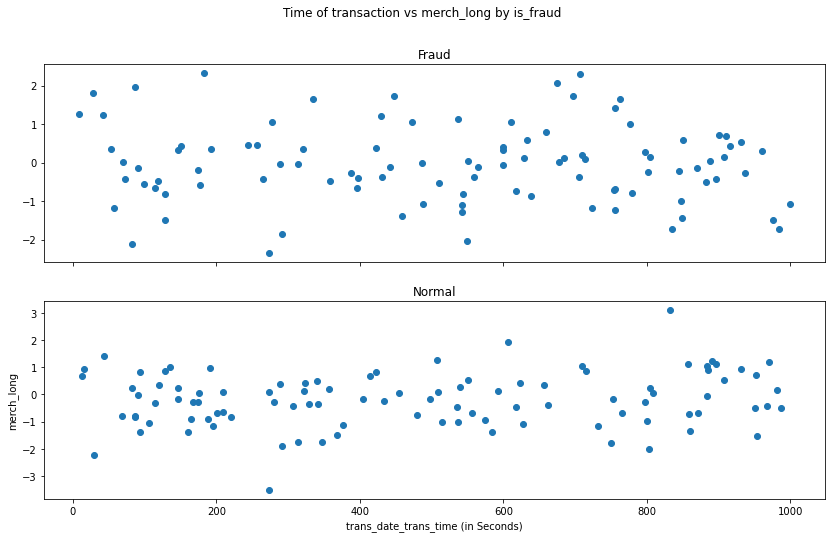

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
num_points = 100
fraud_trans_date_trans_time = np.random.randint(0, 1000, num_points)
fraud_merch_long = np.random.randn(num_points)
normal_trans_date_trans_time = np.random.randint(0, 1000, num_points)
normal_merch_long = np.random.randn(num_points)
Fraud = pd.DataFrame({'trans_date_trans_time': fraud_trans_date_trans_time, 'merch_long': fraud_merch_long})
Normal = pd.DataFrame({'trans_date_trans_time': normal_trans_date_trans_time, 'merch_long': normal_merch_long})
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs merch_long by is_fraud') 
ax1.scatter(Fraud['trans_date_trans_time'], Fraud['merch_long'])
ax1.set_title('Fraud')
ax2.scatter(Normal['trans_date_trans_time'], Normal['merch_long'])
ax2.set_title('Normal')
plt.xlabel('trans_date_trans_time (in Seconds)')
plt.ylabel('merch_long')
plt.show()

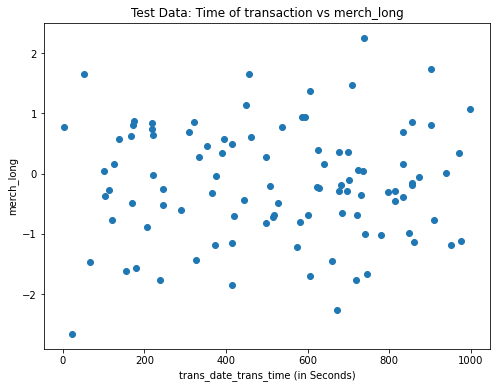

In [18]:
test_trans_date_trans_time = np.random.randint(0, 1000, num_points)
test_merch_long = np.random.randn(num_points)
Test = pd.DataFrame({'trans_date_trans_time': test_trans_date_trans_time, 'merch_long': test_merch_long})
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(Test['trans_date_trans_time'], Test['merch_long'])
ax.set_title('Test Data: Time of transaction vs merch_long')
plt.xlabel('trans_date_trans_time (in Seconds)')
plt.ylabel('merch_long')
plt.show()

In [19]:
data1= data.sample(frac = 0.1, random_state=1)
data1.shape

(129668, 23)

In [20]:
data.shape

(1296675, 23)

In [21]:
Fraud = data1[data1['is_fraud']==1]
Valid = data1[data1['is_fraud']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [22]:
print(outlier_fraction)
print("Fraud Cases: {}".format(len(Fraud)))
print("Valid Cases: {}".format(len(Valid)))

0.005466684242767306
Fraud Cases: 705
Valid Cases: 128963


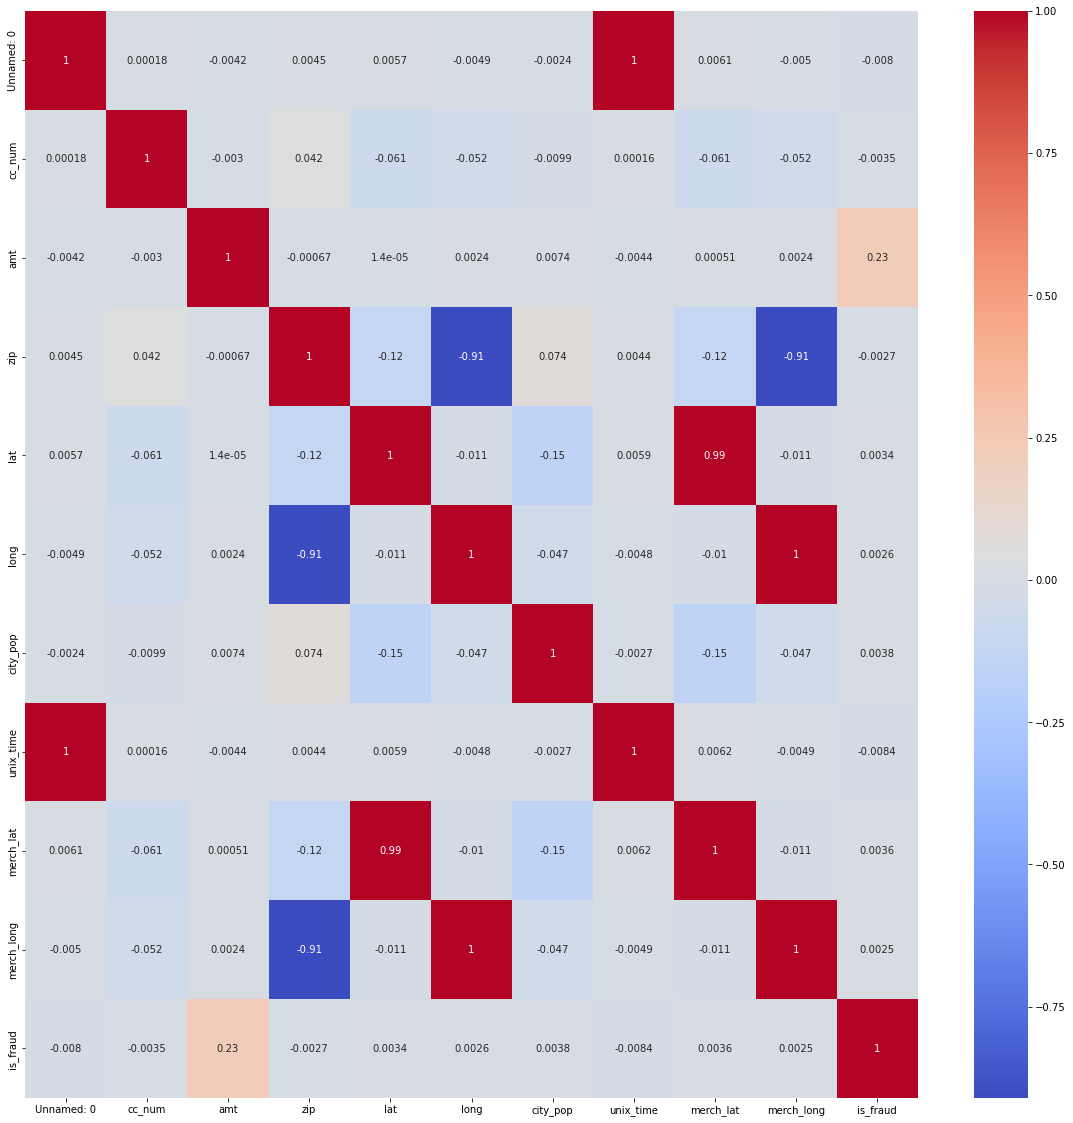

In [23]:
import seaborn as sns
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap="coolwarm")

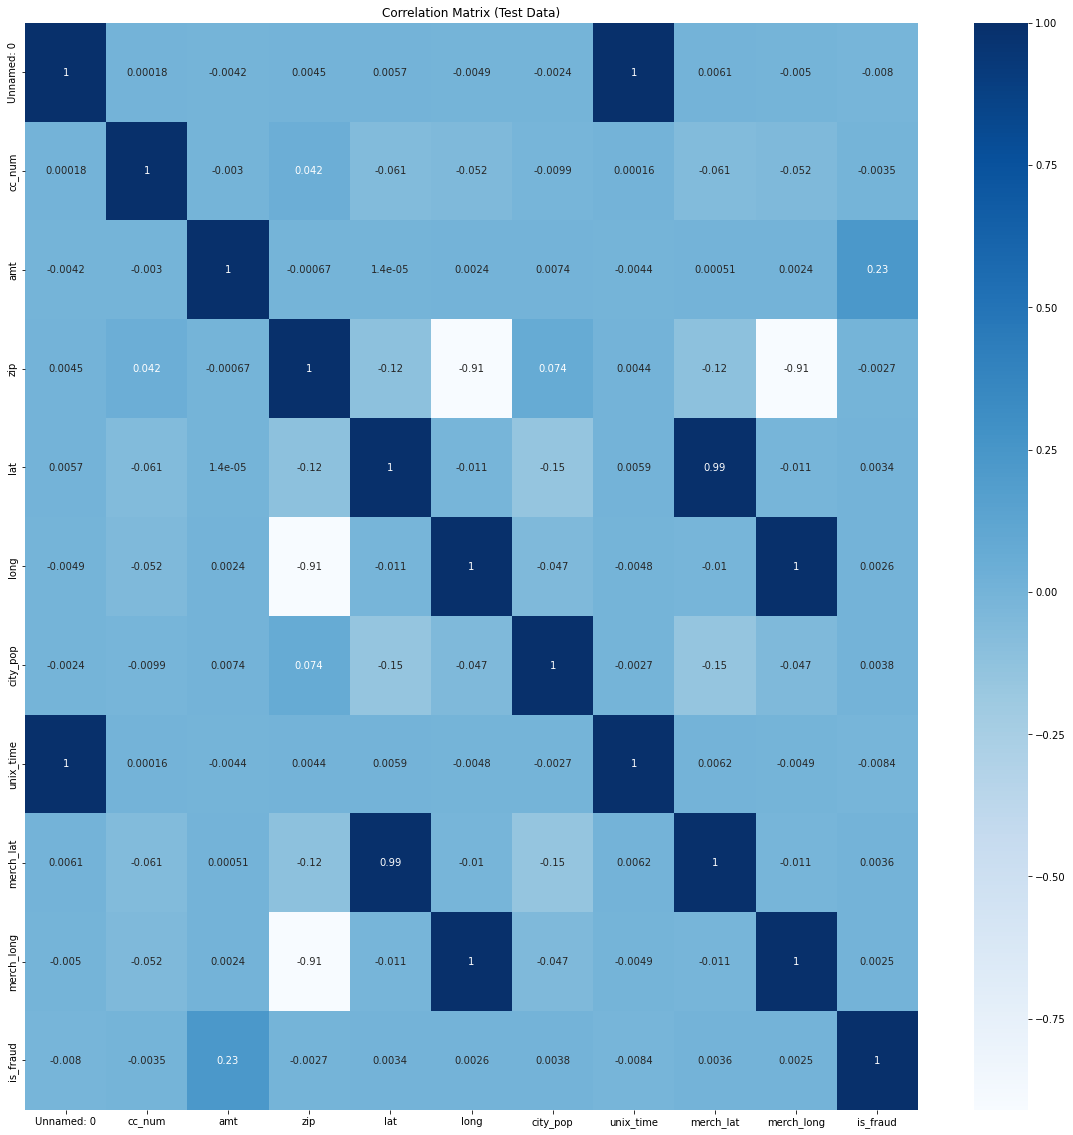

In [24]:
import seaborn as sns
corrmat_test = data1.corr()
top_corr_features_test = corrmat_test.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(data1[top_corr_features_test].corr(), annot=True, cmap="Blues")
plt.title('Correlation Matrix (Test Data)')
plt.show()

In [25]:
columns = data1.columns.tolist() 
columns = [c for c in columns if c not in ["is_fraud"]]
target = "is_fraud"
state = np.random.RandomState(42)
X = data1[columns]
Y= data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(129668, 22)
(129668,)


In [26]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X), 
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                               leaf_size=30, metric='minkowski', 
                                               p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05,
                                           max_iter=-1)
}

In [27]:
classifiers = {
    "Local Outlier Factor": LocalOutlierFactor(novelty=True),
    "Support Vector Machine": OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1),
    "Isolation Forest": IsolationForest(contamination=0.1)
}
print(type(classifiers))

<class 'dict'>
